**Завдання**



В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.



Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:



кількість шарів;
кількість нейронів;
функції активації;
кількість епох;
розмір батчу;
вибір оптимізатора;
різні техніки регуляризації і т.д.


Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.



Рішення оформіть у вигляді окремого ноутбука.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, Input
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.backend import clear_session

Задамо початкові параметри архітектури нейронної мережи та параметри навчання значеннями з попереднього ДЗ:

In [4]:
num_classes = 10 # загальна кількість класів, у нашому випадку це цифри від 0 до 9
num_features = (28, 28) # кількість атрибутів вхідного вектора 28 * 28 = 784

learning_rate = 0.001 # швидкість навчання нейронної мережі
batch_size = 256 # перераховувати ваги мережі ми будемо не на всій вибірці, а на її випадковій підмножині з batch_size елементів

n_hidden_1 = 128 # кількість нейронів 1-го шару
n_hidden_2 = 256 # кількість нейронів 2-го шару

Завантажимо датасет fashion mnist та нормалізуємо дані:

In [5]:
# Завантажуємо датасет
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Перетворюємо цілочисельні пікселі на тип float32
x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

# Нормалізуємо значення пікселів
x_train, x_test = x_train / 255., x_test / 255.

Побудуємо модель, таку, як у попередньому ДЗ:

In [9]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

Проведемо навчання побудованої моделі:

In [23]:
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1146 - loss: 2.3786 - val_accuracy: 0.1762 - val_loss: 2.2927
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1735 - loss: 2.2887 - val_accuracy: 0.2035 - val_loss: 2.2811
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2403 - loss: 2.2800 - val_accuracy: 0.2904 - val_loss: 2.2762
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2958 - loss: 2.2751 - val_accuracy: 0.3102 - val_loss: 2.2715
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3146 - loss: 2.2704 - val_accuracy: 0.3347 - val_loss: 2.2667
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3367 - loss: 2.2656 - val_accuracy: 0.3764 - val_loss: 2.2620
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3741 - loss: 2.2607 - val_accuracy: 0.3969 - val_loss: 2.2572
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3959 - loss: 2.2559 - val_accuracy: 0.

Візуалізуємо результати процесу навчання:

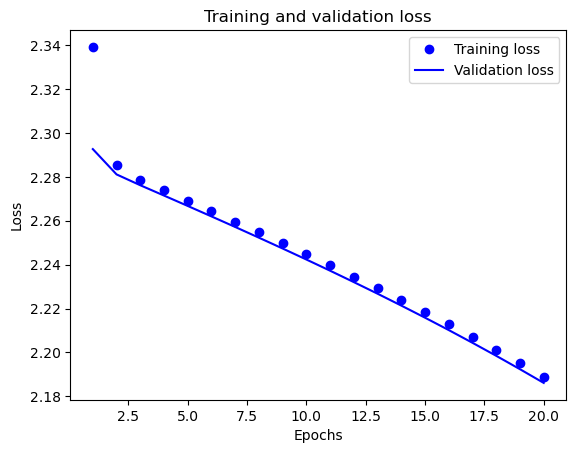

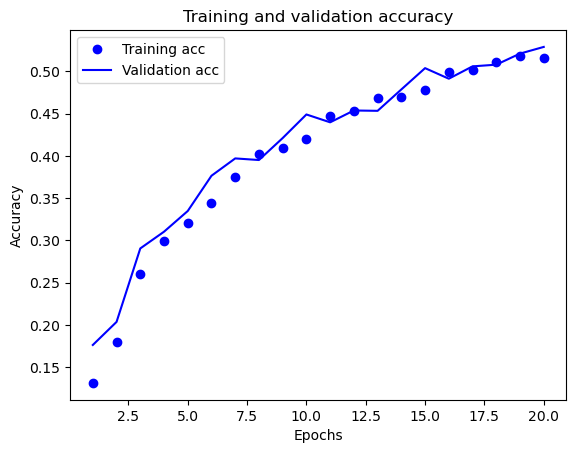

In [25]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Як бачимо, точність не вражає, але судячи з графіків, модель недонавчена, що очікувано для взятого невеликого значення learning rate. Спробуємо збільшити кількість епох:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1021 - loss: 2.4424 - val_accuracy: 0.1245 - val_loss: 2.3228
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1433 - loss: 2.3118 - val_accuracy: 0.2118 - val_loss: 2.2952
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2204 - loss: 2.2933 - val_accuracy: 0.2316 - val_loss: 2.2892
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2347 - loss: 2.2877 - val_accuracy: 0.2789 - val_loss: 2.2845
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.2882 - loss: 2.2832 - val_accuracy: 0.3110 - val_loss: 2.2798
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3253 - loss: 2.2784 - val_accuracy: 0.3459 - val_loss: 2.2751
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3519 - loss: 2.2735 - val_accuracy: 0.3797 - val_loss: 2.2704
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3865 - loss: 2.2691 - val_accuracy: 0.

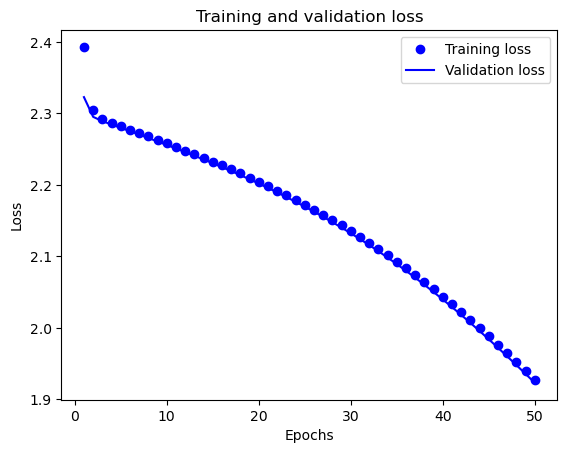

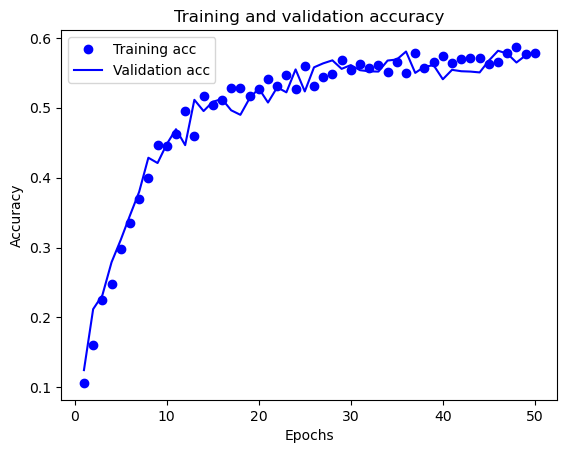

In [29]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Схоже, що процес навчання потрапив у пастку локального мінімуму. Спробуємо збільшити learning rate:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.1508 - loss: 2.3170 - val_accuracy: 0.3514 - val_loss: 2.2590
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3478 - loss: 2.2475 - val_accuracy: 0.4013 - val_loss: 2.2103
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4632 - loss: 2.1952 - val_accuracy: 0.4785 - val_loss: 2.1458
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5187 - loss: 2.1249 - val_accuracy: 0.4916 - val_loss: 2.0580
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5102 - loss: 2.0295 - val_accuracy: 0.5644 - val_loss: 1.9448
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5571 - loss: 1.9127 - val_accuracy: 0.5559 - val_loss: 1.8189
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5587 - loss: 1.7855 - val_accuracy: 0.5571 - val_loss: 1.6984
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5693 - loss: 1.6687 - val_accuracy: 0.

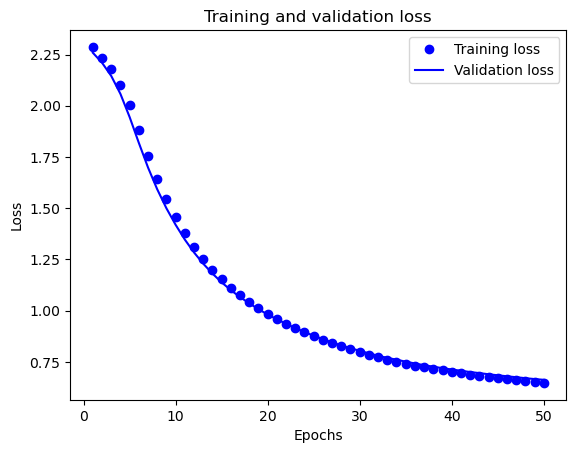

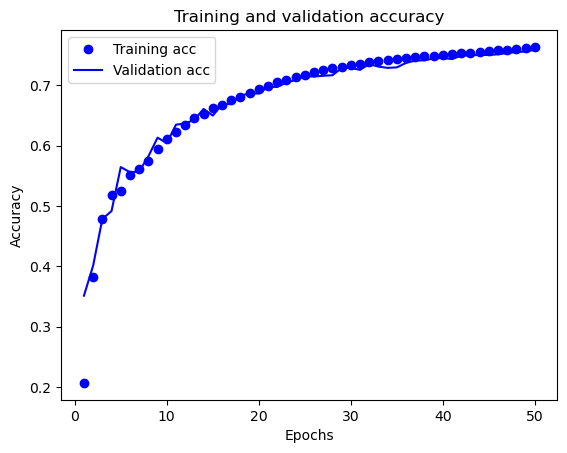

In [31]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат покращився, але збіжність алгоритму досить повільна. Спробуємо алгоритм ADAM:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5543 - loss: 1.4076 - val_accuracy: 0.8041 - val_loss: 0.5546
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8224 - loss: 0.5013 - val_accuracy: 0.8342 - val_loss: 0.4647
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8511 - loss: 0.4179 - val_accuracy: 0.8455 - val_loss: 0.4301
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8603 - loss: 0.3877 - val_accuracy: 0.8522 - val_loss: 0.4104
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8702 - loss: 0.3611 - val_accuracy: 0.8557 - val_loss: 0.3941
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8766 - loss: 0.3408 - val_accuracy: 0.8618 - val_loss: 0.3820
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8798 - loss: 0.3309 - val_accuracy: 0.8651 - val_loss: 0.3725
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8834 - loss: 0.3233 - val_accuracy: 0.

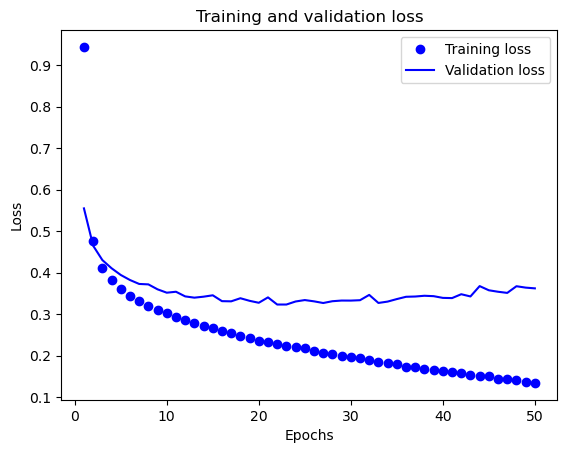

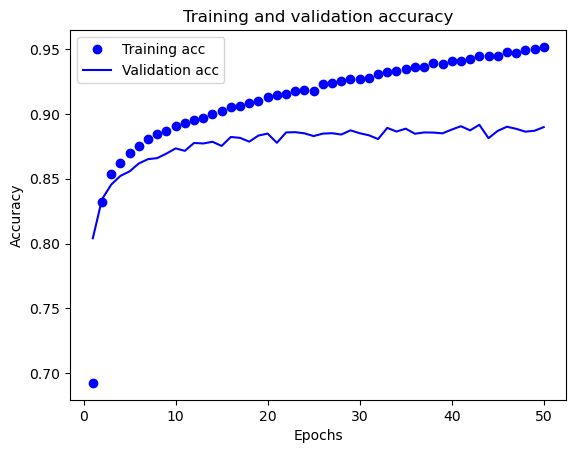

In [33]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=batch_size,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Тепер ми досягли 89% точності на тестових даних та 95% на навчальних. При чому точність на тестових даних майже не зростала 3 20-ї епохи, а точність на тренувальних продовжує зростати, що говорить про перенавчання моделі. Спробуємо зменшити batch_size:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6808 - loss: 0.9610 - val_accuracy: 0.8392 - val_loss: 0.4566
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8514 - loss: 0.4151 - val_accuracy: 0.8515 - val_loss: 0.4103
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8685 - loss: 0.3658 - val_accuracy: 0.8444 - val_loss: 0.4349
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8733 - loss: 0.3427 - val_accuracy: 0.8655 - val_loss: 0.3734
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8798 - loss: 0.3231 - val_accuracy: 0.8728 - val_loss: 0.3521
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8891 - loss: 0.3061 - val_accuracy: 0.8704 - val_loss: 0.3550
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8931 - loss: 0.2921 - val_accuracy: 0.8769 - val_loss: 0.3405
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8958 - loss: 0.2832 - val_accuracy: 0.

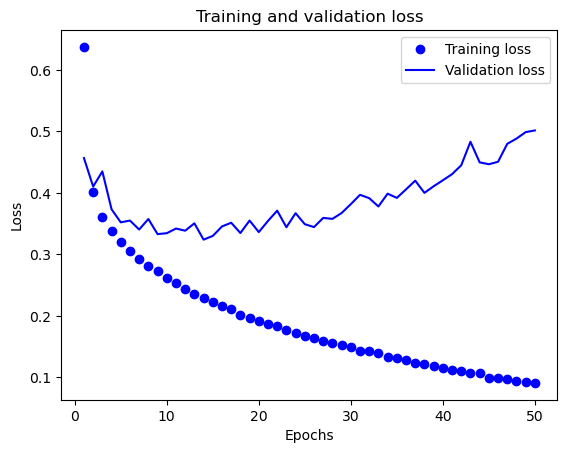

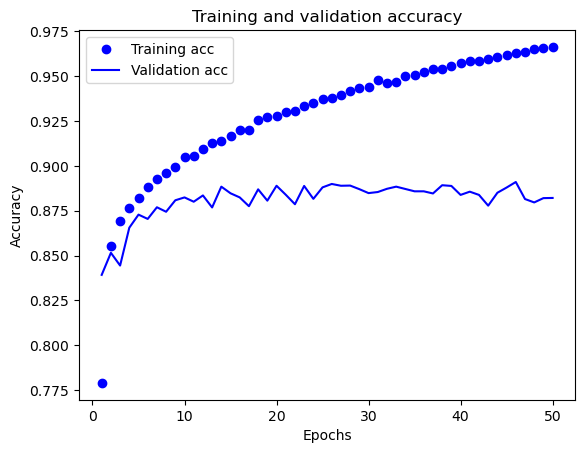

In [35]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат майже не змінився. Спробуємо ще зменшити batch_size:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.7532 - loss: 0.6796 - val_accuracy: 0.8421 - val_loss: 0.4371
Epoch 2/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8618 - loss: 0.3763 - val_accuracy: 0.8646 - val_loss: 0.3773
Epoch 3/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8720 - loss: 0.3373 - val_accuracy: 0.8611 - val_loss: 0.3851
Epoch 4/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8869 - loss: 0.3048 - val_accuracy: 0.8714 - val_loss: 0.3608
Epoch 5/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8885 - loss: 0.2991 - val_accuracy: 0.8679 - val_loss: 0.3564
Epoch 6/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.8936 - loss: 0.2793 - val_accuracy: 0.8744 - val_loss: 0.3409
Epoch 7/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9007 - loss: 0.2642 - val_accuracy: 0.8825 - val_loss: 0.3252
Epoch 8/50
7500/7500 ━━━━━━━━━━━━━━━━━━━━ 9s 1ms/step - accuracy: 0.9054 - loss: 0.

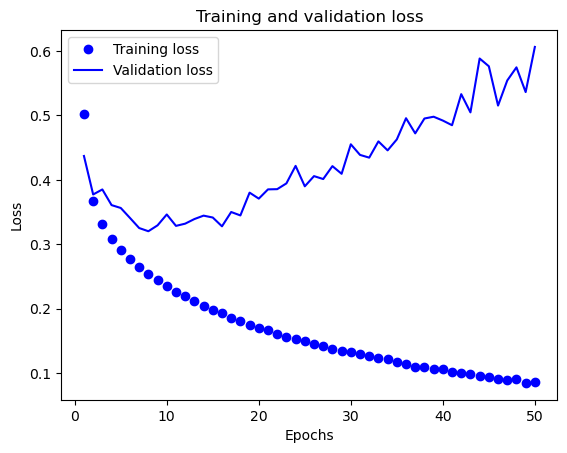

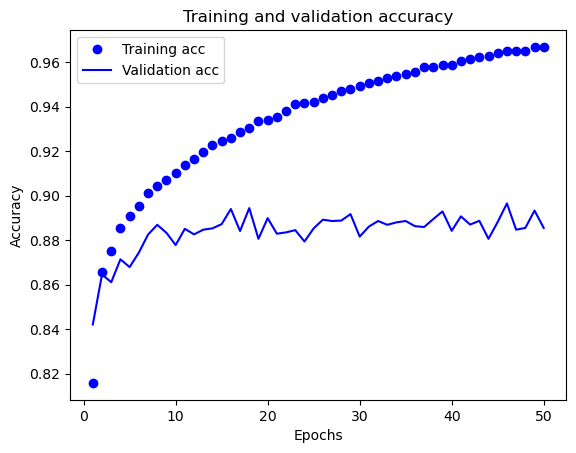

In [39]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(n_hidden_2, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=8,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Картина та ж сама. Повернемо попереднє значення batch_size та спробуємо полегшити модель, прибравши один з прихованих шарів:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7415 - loss: 0.8063 - val_accuracy: 0.8293 - val_loss: 0.4777
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8499 - loss: 0.4200 - val_accuracy: 0.8496 - val_loss: 0.4213
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8651 - loss: 0.3806 - val_accuracy: 0.8571 - val_loss: 0.4004
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8725 - loss: 0.3563 - val_accuracy: 0.8589 - val_loss: 0.3895
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8804 - loss: 0.3284 - val_accuracy: 0.8699 - val_loss: 0.3641
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8857 - loss: 0.3159 - val_accuracy: 0.8738 - val_loss: 0.3581
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8924 - loss: 0.2972 - val_accuracy: 0.8733 - val_loss: 0.3524
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8935 - loss: 0.2891 - val_accuracy: 0.

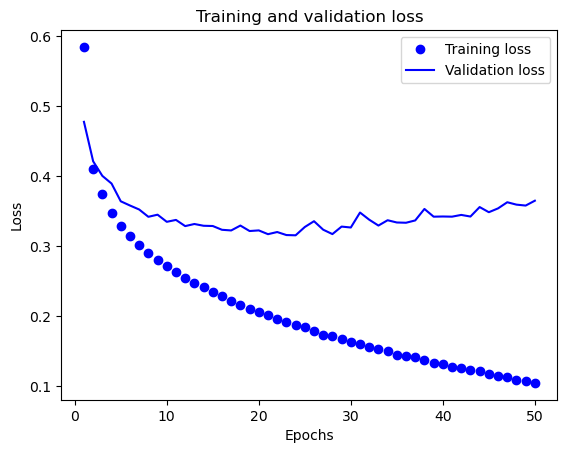

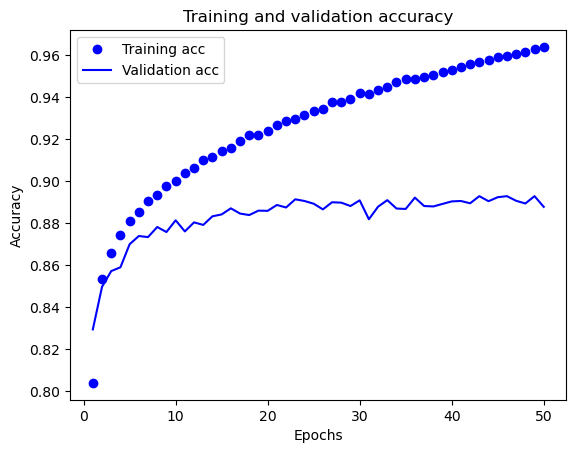

In [41]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Як бачимо, результат знову не змінився. Тобто початкова складність нашої моделі була надлишковою. Спробуємо змінити активаційну функцію:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7672 - loss: 0.6636 - val_accuracy: 0.8421 - val_loss: 0.4651
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8612 - loss: 0.3946 - val_accuracy: 0.8573 - val_loss: 0.3932
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8740 - loss: 0.3537 - val_accuracy: 0.8699 - val_loss: 0.3639
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8846 - loss: 0.3187 - val_accuracy: 0.8718 - val_loss: 0.3643
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8892 - loss: 0.2994 - val_accuracy: 0.8769 - val_loss: 0.3436
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8925 - loss: 0.2878 - val_accuracy: 0.8698 - val_loss: 0.3613
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8979 - loss: 0.2768 - val_accuracy: 0.8781 - val_loss: 0.3388
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9024 - loss: 0.2631 - val_accuracy: 0.

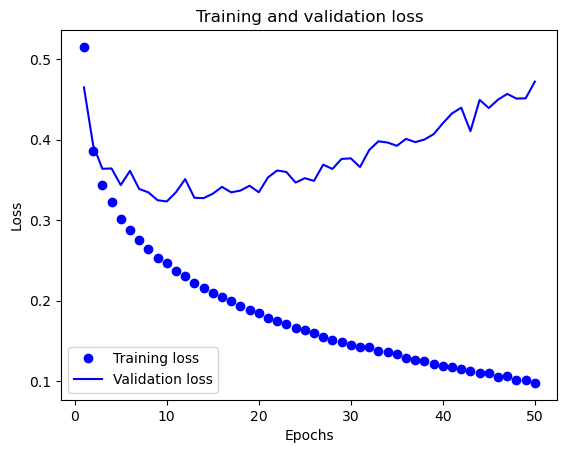

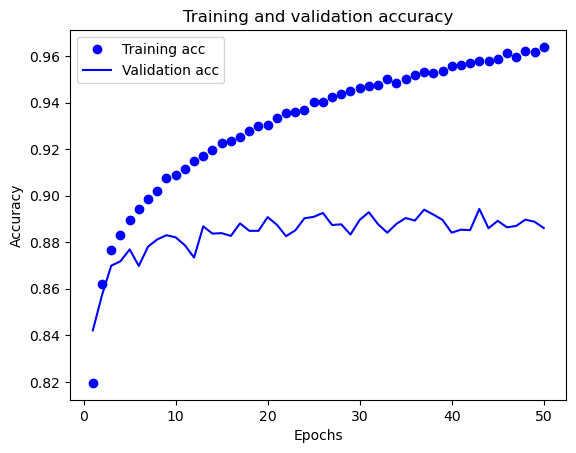

In [42]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат трохи погіршився. Спробуємо ще змінити активаційну функцію, на цей раз на leaky relu:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7731 - loss: 0.6556 - val_accuracy: 0.8286 - val_loss: 0.4743
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8550 - loss: 0.4110 - val_accuracy: 0.8545 - val_loss: 0.4152
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8664 - loss: 0.3760 - val_accuracy: 0.8578 - val_loss: 0.3950
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8758 - loss: 0.3421 - val_accuracy: 0.8690 - val_loss: 0.3676
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8841 - loss: 0.3202 - val_accuracy: 0.8638 - val_loss: 0.3746
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8896 - loss: 0.3049 - val_accuracy: 0.8664 - val_loss: 0.3727
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8921 - loss: 0.2927 - val_accuracy: 0.8672 - val_loss: 0.3708
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8964 - loss: 0.2859 - val_accuracy: 0.

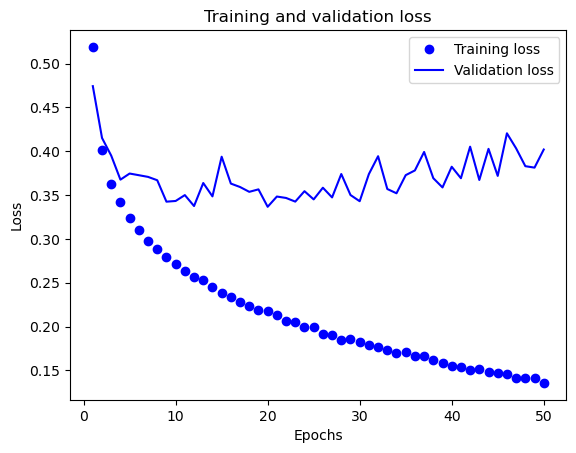

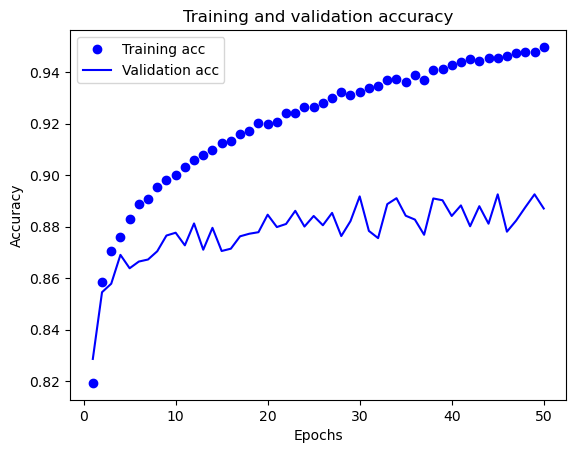

In [43]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='leaky_relu'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат знову не покращився. Спробуємо L1 регуляризацію:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.6554 - loss: 7.3837 - val_accuracy: 0.7191 - val_loss: 1.3365
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7358 - loss: 1.2951 - val_accuracy: 0.7386 - val_loss: 1.2224
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7492 - loss: 1.1943 - val_accuracy: 0.7568 - val_loss: 1.1417
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7581 - loss: 1.1307 - val_accuracy: 0.7499 - val_loss: 1.1167
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7616 - loss: 1.0937 - val_accuracy: 0.7621 - val_loss: 1.0757
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7683 - loss: 1.0676 - val_accuracy: 0.7722 - val_loss: 1.0550
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7704 - loss: 1.0512 - val_accuracy: 0.7685 - val_loss: 1.0373
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7765 - loss: 1.0287 - val_accuracy: 0.

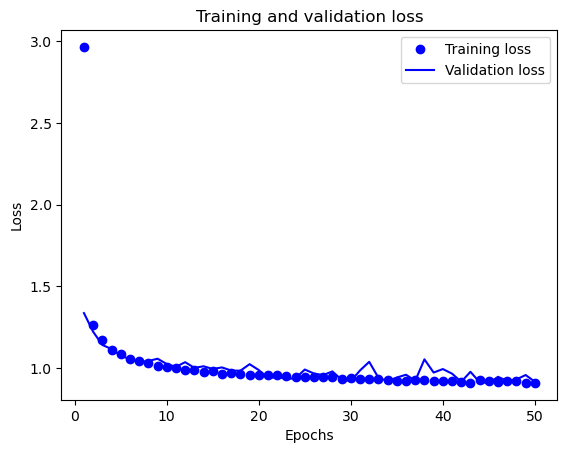

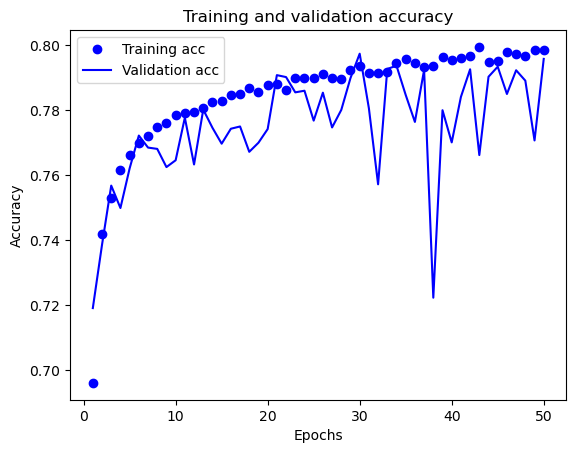

In [44]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='relu', kernel_regularizer=tf.keras.regularizers.l1(0.01)),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат значно погіршився. Спробуємо L2 регуляризацію:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7576 - loss: 1.4515 - val_accuracy: 0.8004 - val_loss: 0.6674
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8159 - loss: 0.6393 - val_accuracy: 0.7939 - val_loss: 0.6656
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8219 - loss: 0.6136 - val_accuracy: 0.8144 - val_loss: 0.6151
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8272 - loss: 0.5873 - val_accuracy: 0.7786 - val_loss: 0.7093
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8270 - loss: 0.5855 - val_accuracy: 0.8242 - val_loss: 0.6080
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8314 - loss: 0.5678 - val_accuracy: 0.8112 - val_loss: 0.6278
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8368 - loss: 0.5545 - val_accuracy: 0.8302 - val_loss: 0.5829
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8367 - loss: 0.5486 - val_accuracy: 0.

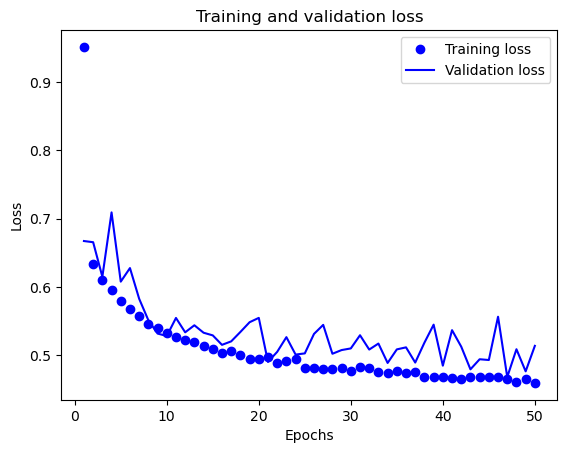

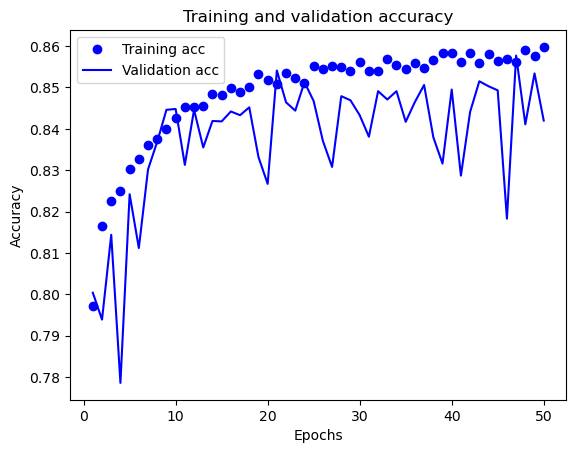

In [45]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Результат знову гірший. Спробуємо elastic net регуляризацію:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6385 - loss: 7.7529 - val_accuracy: 0.7278 - val_loss: 1.3631
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7336 - loss: 1.3165 - val_accuracy: 0.7358 - val_loss: 1.2504
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7460 - loss: 1.2201 - val_accuracy: 0.7549 - val_loss: 1.1788
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7566 - loss: 1.1533 - val_accuracy: 0.7611 - val_loss: 1.1361
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7635 - loss: 1.1157 - val_accuracy: 0.7661 - val_loss: 1.0802
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7684 - loss: 1.0855 - val_accuracy: 0.7703 - val_loss: 1.0777
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7684 - loss: 1.0647 - val_accuracy: 0.7499 - val_loss: 1.1393
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7725 - loss: 1.0556 - val_accuracy: 0.

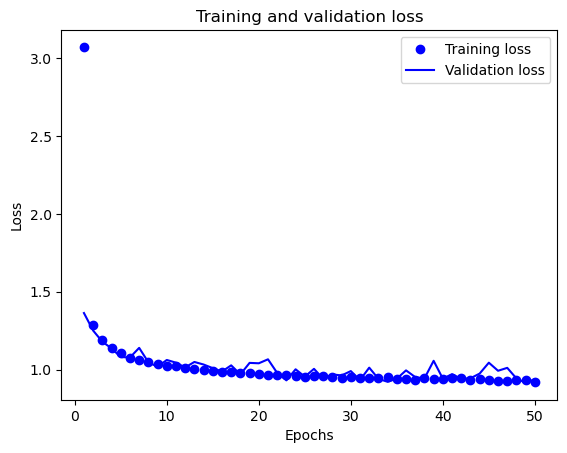

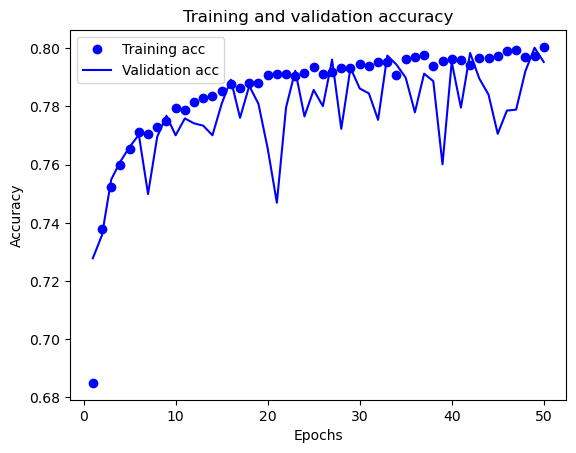

In [46]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(n_hidden_1, activation='relu', kernel_regularizer=tf.keras.regularizers.L1L2(0.01, 0.01)),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Регуляризація не покращує нашу моедль. Спробуємо збільшити кількість нейронів у прихованому шарі:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.7829 - loss: 0.6218 - val_accuracy: 0.8429 - val_loss: 0.4333
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8645 - loss: 0.3752 - val_accuracy: 0.8412 - val_loss: 0.4441
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8805 - loss: 0.3297 - val_accuracy: 0.8738 - val_loss: 0.3521
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8897 - loss: 0.3010 - val_accuracy: 0.8648 - val_loss: 0.3830
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8941 - loss: 0.2845 - val_accuracy: 0.8732 - val_loss: 0.3483
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9021 - loss: 0.2633 - val_accuracy: 0.8772 - val_loss: 0.3510
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9077 - loss: 0.2528 - val_accuracy: 0.8828 - val_loss: 0.3361
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9104 - loss: 0.2424 - val_accuracy: 0.

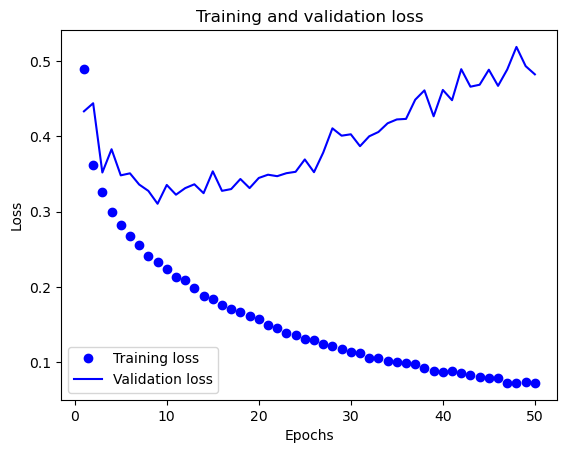

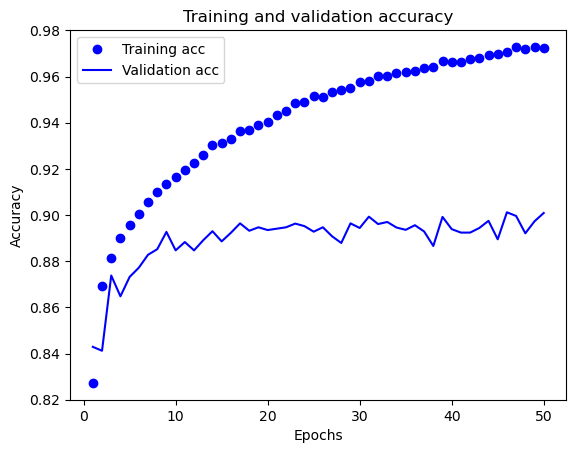

In [47]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Здається, збільшення кількості нейронів не дало покращення, можливо дуже невелике. Але спробуємо тепер зменшити їх кількість:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7708 - loss: 0.6738 - val_accuracy: 0.8384 - val_loss: 0.4612
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8549 - loss: 0.4013 - val_accuracy: 0.8594 - val_loss: 0.3942
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8744 - loss: 0.3513 - val_accuracy: 0.8600 - val_loss: 0.3894
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8804 - loss: 0.3278 - val_accuracy: 0.8632 - val_loss: 0.3756
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8879 - loss: 0.3086 - val_accuracy: 0.8646 - val_loss: 0.3747
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8940 - loss: 0.2912 - val_accuracy: 0.8733 - val_loss: 0.3522
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8973 - loss: 0.2782 - val_accuracy: 0.8789 - val_loss: 0.3422
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9014 - loss: 0.2701 - val_accuracy: 0.

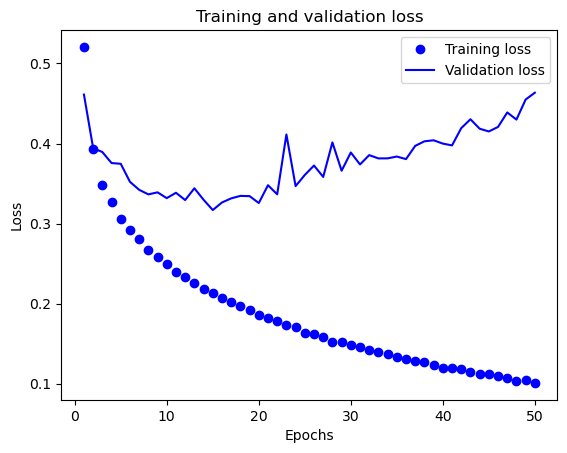

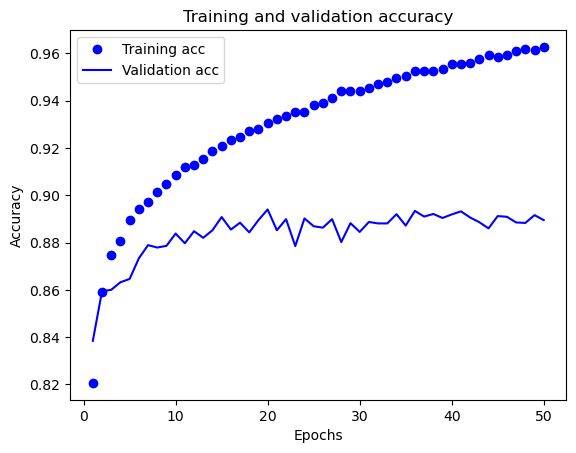

In [48]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Схоже, що різниці знову майже немає, хоча й схоже, що збільшення давало ледь помітне покращення моделі. Але спробуємо ще додати дропаут:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7613 - loss: 0.6774 - val_accuracy: 0.8483 - val_loss: 0.4247
Epoch 2/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8550 - loss: 0.4048 - val_accuracy: 0.8585 - val_loss: 0.3959
Epoch 3/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8660 - loss: 0.3688 - val_accuracy: 0.8683 - val_loss: 0.3756
Epoch 4/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8773 - loss: 0.3376 - val_accuracy: 0.8688 - val_loss: 0.3651
Epoch 5/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8798 - loss: 0.3247 - val_accuracy: 0.8706 - val_loss: 0.3603
Epoch 6/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8840 - loss: 0.3121 - val_accuracy: 0.8750 - val_loss: 0.3429
Epoch 7/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8893 - loss: 0.2986 - val_accuracy: 0.8802 - val_loss: 0.3350
Epoch 8/50
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8911 - loss: 0.2942 - val_accuracy: 0.

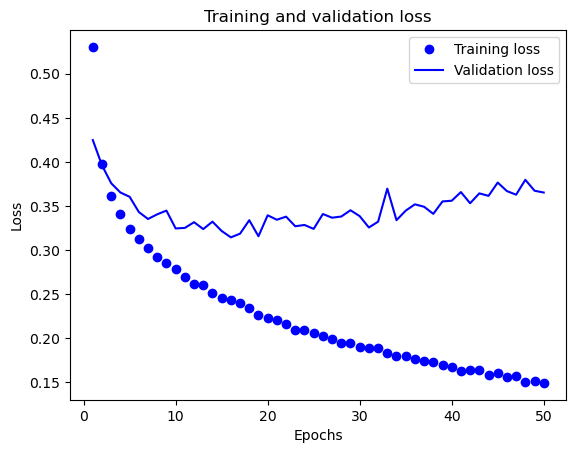

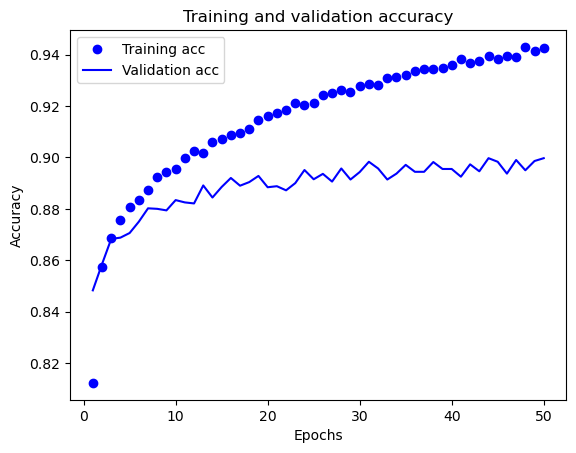

In [49]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=50,
    batch_size=64,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Позитивний вплив дропауту ледь помітний. Спробуємо збільшити кількість нейронів разом з дропаутом, а разом з цим збільшимо кількість епох, batch_size та повернемо сигмоїду на прихованому шарі:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       401,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 407,050 (1.55 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6338 - loss: 1.0401 - val_accuracy: 0.8129 - val_loss: 0.5248
Epoch 2/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8118 - loss: 0.5219 - val_accuracy: 0.8323 - val_loss: 0.4663
Epoch 3/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8323 - loss: 0.4693 - val_accuracy: 0.8403 - val_loss: 0.4413
Epoch 4/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8456 - loss: 0.4321 - val_accuracy: 0.8464 - val_loss: 0.4263
Epoch 5/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8479 - loss: 0.4207 - val_accuracy: 0.8526 - val_loss: 0.4099
Epoch 6/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8527 - loss: 0.4045 - val_accuracy: 0.8548 - val_loss: 0.4045
Epoch 7/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8581 - loss: 0.3910 - val_accuracy: 0.8603 - val_loss: 0.3909
Epoch 8/100
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8626 - loss: 0.3785 - val_accu

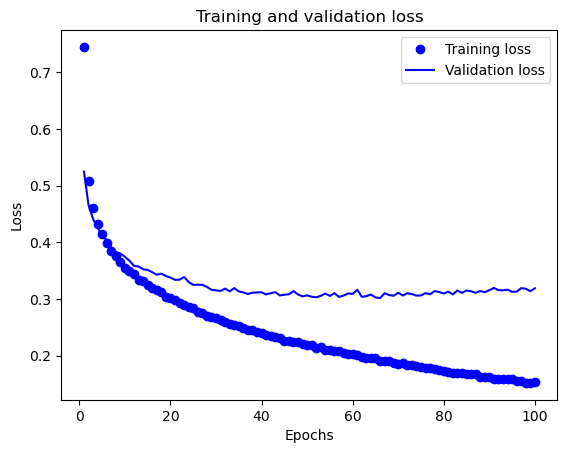

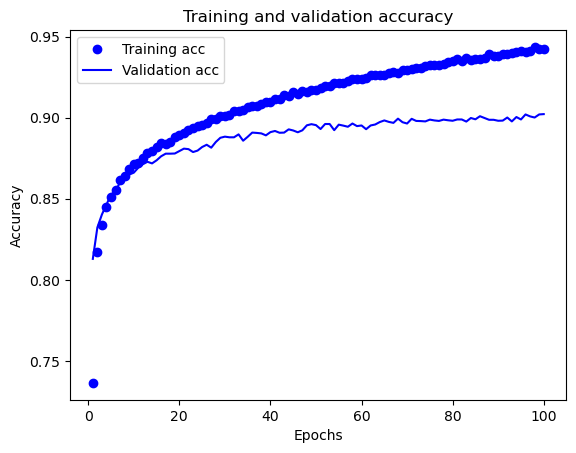

In [50]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(512, activation='sigmoid'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=100,
    batch_size=256,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Збільшимо ще кількість нейронів, дропаут та кількість епох:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 814,090 (3.11 MB)

 Trainable params: 814,090 (3.11 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6027 - loss: 1.1447 - val_accuracy: 0.8091 - val_loss: 0.5328
Epoch 2/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7952 - loss: 0.5650 - val_accuracy: 0.8252 - val_loss: 0.4827
Epoch 3/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8151 - loss: 0.5053 - val_accuracy: 0.8341 - val_loss: 0.4563
Epoch 4/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8278 - loss: 0.4799 - val_accuracy: 0.8392 - val_loss: 0.4393
Epoch 5/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8338 - loss: 0.4593 - val_accuracy: 0.8421 - val_loss: 0.4329
Epoch 6/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8415 - loss: 0.4439 - val_accuracy: 0.8509 - val_loss: 0.4155
Epoch 7/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8478 - loss: 0.4246 - val_accuracy: 0.8482 - val_loss: 0.4129
Epoch 8/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.8483 - loss: 0.4175 - val_accu

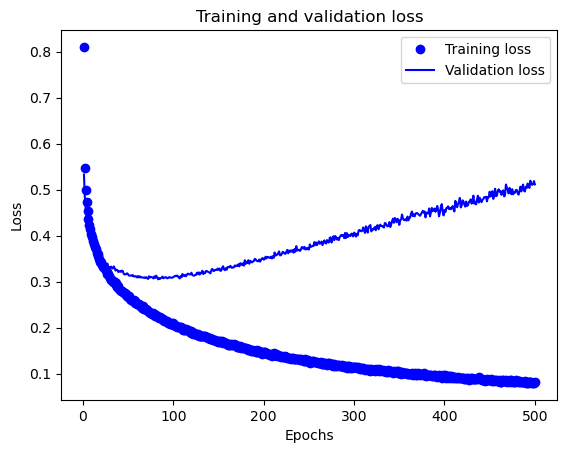

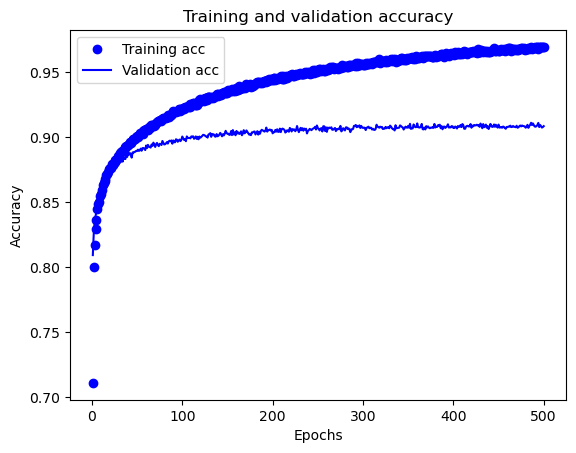

In [11]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(1024, activation='sigmoid'),
    layers.Dropout(0.75),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=256,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

Нам вдалося досягти 91% точності на тестовій вибірці. Спробуємо ще один варіант - додамо другий прихований шар з кількістю нейронів, що відповідає значенню дропауту на першому:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       803,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,068,810 (4.08 MB)

 Trainable params: 1,068,810 (4.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5852 - loss: 1.1935 - val_accuracy: 0.8050 - val_loss: 0.5268
Epoch 2/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8051 - loss: 0.5351 - val_accuracy: 0.8287 - val_loss: 0.4702
Epoch 3/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8214 - loss: 0.4851 - val_accuracy: 0.8450 - val_loss: 0.4356
Epoch 4/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8325 - loss: 0.4541 - val_accuracy: 0.8479 - val_loss: 0.4223
Epoch 5/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8465 - loss: 0.4217 - val_accuracy: 0.8543 - val_loss: 0.4104
Epoch 6/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8478 - loss: 0.4136 - val_accuracy: 0.8499 - val_loss: 0.4076
Epoch 7/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8547 - loss: 0.3996 - val_accuracy: 0.8572 - val_loss: 0.3896
Epoch 8/500
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8568 - loss: 0.3883 - 

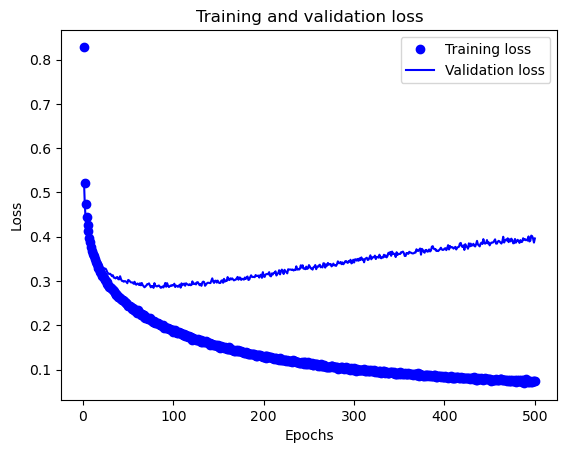

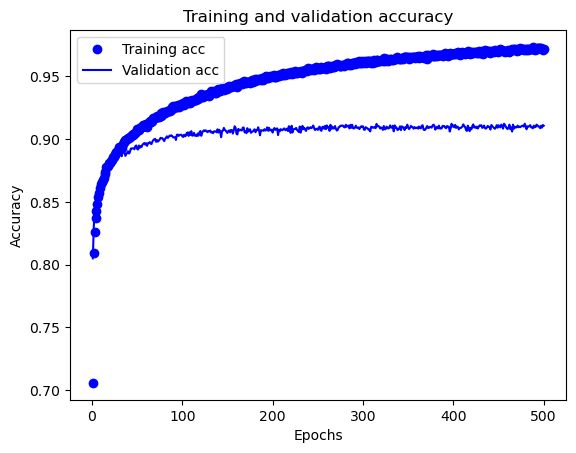

In [13]:
clear_session()

model = models.Sequential([
    layers.Flatten(input_shape=num_features),
    layers.Dense(1024, activation='sigmoid'),
    layers.Dropout(0.75),
    layers.Dense(256, activation='sigmoid'),
    layers.Dense(num_classes, activation='softmax')
])


optimizer = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

history = model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=256,
    validation_data=(x_test, y_test),
    verbose = 1
)

train_loss, train_acc = model.evaluate(x_train, y_train)
print('Точність на тренувальних даних:', train_acc)
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Точність на тестових даних:', test_acc)

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.clf()
val_acc_values = history_dict['val_accuracy']
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

**Висновок**
  
В процесі експериментування нам вдалося досягти 91% точності моделі на тестових даних, але схоже ціною перенавчання.